In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from  tensorflow.keras.preprocessing import image
import pandas as ps
import numpy as np

In [27]:
img_size = [64,64,3]

In [28]:
train = 'train/'
test ='test/'

In [29]:
train_datagen = ImageDataGenerator(shear_range=0.5,
                                  rescale=1./255,
                                  horizontal_flip=False,
                                  zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
training_set = train_datagen.flow_from_directory(train,target_size=(64,64),batch_size=20,
                                                class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [31]:
testing_set = test_datagen.flow_from_directory(test,target_size=(64,64),batch_size=20,
                                                class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [32]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [33]:
model = keras.Sequential([
    keras.layers.Conv2D(32,kernel_size = 3, input_shape=[64,64,3]),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(64,kernel_size = 3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(128,kernel_size = 3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(256,kernel_size = 3),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(2,activation='softmax')  
])

In [74]:
model.compile(optimizer ='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
batch_size = 32,

In [35]:
model.fit(training_set,validation_data=testing_set,
         steps_per_epoch=len(testing_set),
         epochs=30,
         validation_steps=len(testing_set))

Epoch 1/30
50/50 [==============================] - 10s 170ms/step - loss: 0.7275 - accuracy: 0.5060 - val_loss: 0.6940 - val_accuracy: 0.5010
Epoch 2/30
50/50 [==============================] - 11s 224ms/step - loss: 0.6863 - accuracy: 0.5520 - val_loss: 0.6714 - val_accuracy: 0.5790
Epoch 3/30
50/50 [==============================] - 11s 216ms/step - loss: 0.6941 - accuracy: 0.5360 - val_loss: 0.6865 - val_accuracy: 0.5380
Epoch 4/30
50/50 [==============================] - 10s 208ms/step - loss: 0.6992 - accuracy: 0.5440 - val_loss: 0.6826 - val_accuracy: 0.5800
Epoch 5/30
50/50 [==============================] - 10s 205ms/step - loss: 0.6862 - accuracy: 0.5600 - val_loss: 0.6725 - val_accuracy: 0.5770
Epoch 6/30
50/50 [==============================] - 10s 205ms/step - loss: 0.6864 - accuracy: 0.5770 - val_loss: 0.6810 - val_accuracy: 0.5050
Epoch 7/30
50/50 [==============================] - 12s 232ms/step - loss: 0.6623 - accuracy: 0.6110 - val_loss: 0.6342 - val_accuracy: 0.6560

In [36]:
model.save('Cat_Dog_Classifier.h5')

In [37]:
model1 = keras.models.load_model("Cat_Dog_Classifier.h5")

In [68]:
cat_img_path = 'test/cats/cat.1633.jpg'

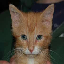

In [69]:
img = image.load_img(cat_img_path,target_size=(64,64))
img

In [70]:
x =image.img_to_array(img)
x = x/255
x =np.expand_dims(x,axis=0)
pred = np.argmax(model1.predict(x)[0],axis=0)

if pred == 0:
    print('CAT')
else:
    print("DOG")

1/1 [==============================] - 0s 21ms/step
CAT


In [71]:
dog_img_path = 'test/dogs/dog.1632.jpg'

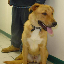

In [72]:
img = image.load_img(dog_img_path,target_size=(64,64))
img

In [73]:
x =image.img_to_array(img)
x = x/255
x =np.expand_dims(x,axis=0)
pred = np.argmax(model1.predict(x)[0],axis=0)

if pred == 1:
    print('DOG')
else:
    print("CAT")

1/1 [==============================] - 0s 23ms/step
DOG
